#**GDG TASK 1**


Welcome to GDG!

Your first task in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [ ]:
!pip install ydata-profiling -q

Mount your Google Drive onto this notebook.

In [ ]:
# write code here

Import basic libraries.

In [ ]:
import ydata_profiling as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import other libraries here

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/file/d/14384FUrzE1gB7HWn8GmAJe3hfx6Glv8R/view?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [ ]:
# read dataset into a variable
df = pd.read_csv('/content/Task1.csv')


View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [ ]:
# write code here
df.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [ ]:
# write code here
df.columns


Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [ ]:
# drop the column, then view its first 5 values
df = df.drop(columns='id',axis=1)
df.head()


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Display the the number of rows and columns in this dataset.

In [ ]:
# write code here
df.shape


(74051, 9)

Use the info() function to get, well, info about it.

In [ ]:
# write code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [ ]:
# write code here
df.describe()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


count gives the total number of non null entry

std is the standard devivation

* mean doesnot tell about the distribution

* example 3,3,3 and 2,3,4 mean is 3 of both but the spread is different

* then the variance is used to calcuate spread but as it is square not in the dimension of the data therefore we use std which is square root of the varianace.



mean is average

**last 5 rows states about the five-number summary**

Min - Lowest value

Q1 (25%) - Lower quartile(basically value at 25 percentile)

Median (50%) - Middle value

Q3 (75%) - Upper quartile(basically value at 75 percentile)

Max - Highest value

Write a function to print all the unique values in the columns of Sex and Age.

In [ ]:
# write code here
def print_unique(data,cols):
  for col in cols:
    print(f'Unique values in {col}:\n{data[col].unique()}')


In [ ]:
print_unique(df,['Sex','Age'])

Unique values in Sex:
['I' 'M' 'F']
Unique values in Age:
[ 9  8 11 10 12  7  5 14  6 13 16  4 18 15 17  3 19 23 21 20 26 22 27 24
 25 29  2  1]


List out the number of crabs belonging to each gender.

In [ ]:
# write code here
df.groupby('Sex')['Sex'].count()


,Sex
Sex,
F,23010
I,23957
M,27084


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [ ]:
# write code here
profile = pp.ProfileReport(df)
profile.to_file("report.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 20.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [ ]:
# drop the necessary rows as asked above
df = df.loc[df['Height']>0]


If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [ ]:
# write code here
df.shape


(74027, 9)

In [ ]:
# as we drop some columns to make index again normal


#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [ ]:
# write the logic here before you actually plot the graph
avg_age = df.groupby('Sex')['Age'].mean()


x axis will contain Sex, and y axis has the average age.

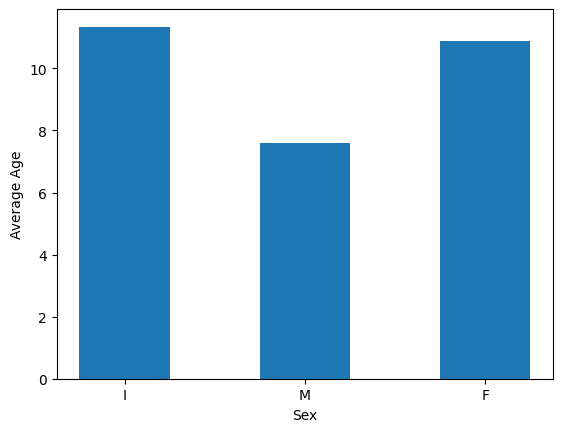

In [ ]:
# plot the graph here
plt.bar(df['Sex'].unique(), avg_age,width = 0.5)
plt.xlabel("Sex")
plt.ylabel("Average Age")
plt.show()

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



<Axes: xlabel='Sex', ylabel='Age'>

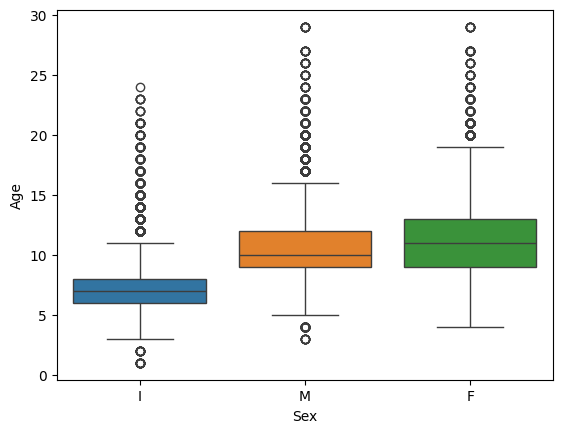

In [ ]:
# plot the graph here
sns.boxplot(x='Sex',y='Age',data=df,hue='Sex')


Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

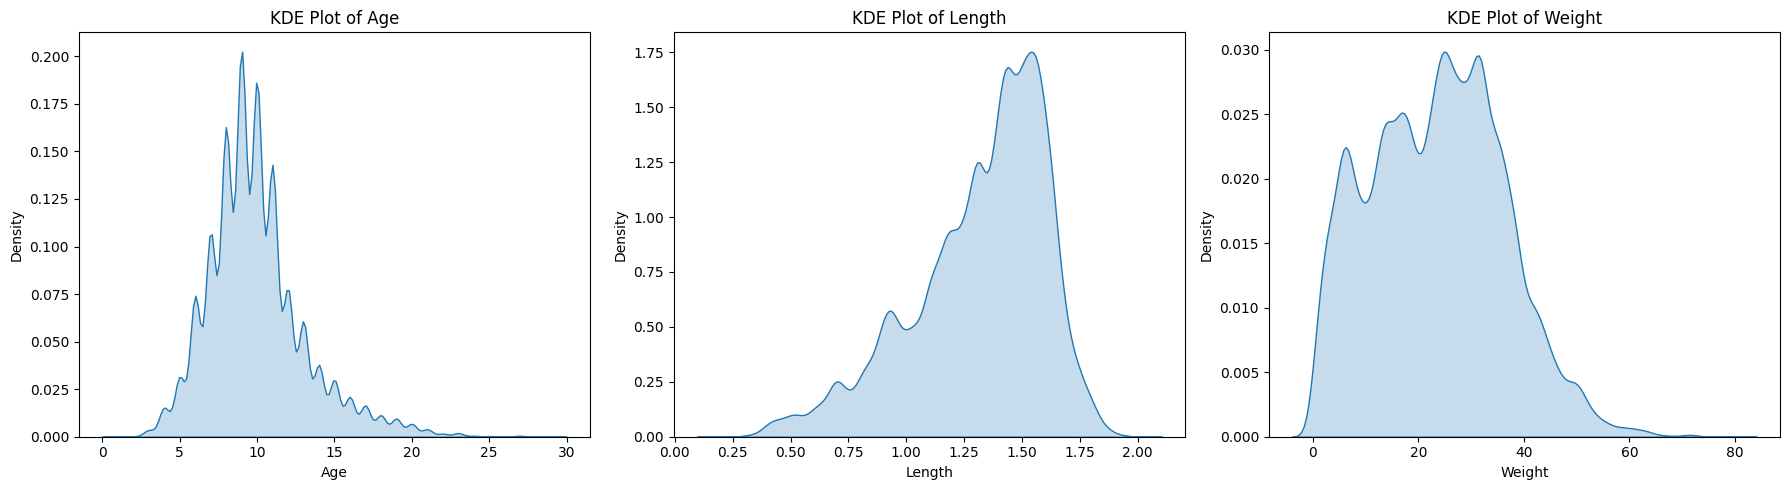

In [ ]:
# write code that yields output similar to the one shown below
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(df['Age'], ax=axes[0], fill=True)
axes[0].set_title('KDE Plot of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

sns.kdeplot(df['Length'], ax=axes[1], fill=True)
axes[1].set_title('KDE Plot of Length')
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Density')

sns.kdeplot(df['Weight'], ax=axes[2], fill=True)
axes[2].set_title('KDE Plot of Weight')
axes[2].set_xlabel('Weight')
axes[2].set_ylabel('Density')

plt.tight_layout()

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

<Axes: xlabel='Age', ylabel='Diameter'>

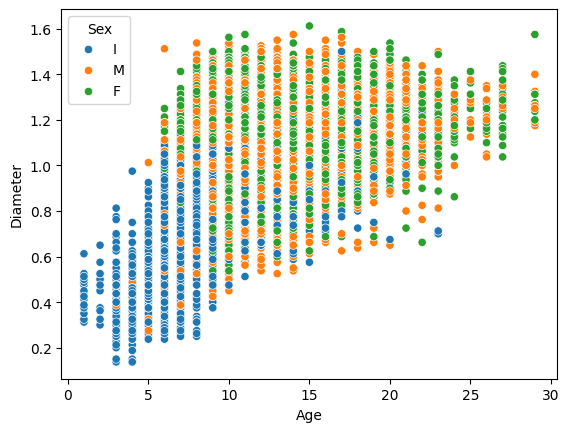

In [ ]:
# plot the graph here
sns.scatterplot(data=df,x='Age',y='Diameter',hue='Sex')

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [ ]:
# write code here
numerical_cols=df.select_dtypes(include=['number']).columns
df[numerical_cols].corr()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.989418,0.918402,0.936407,0.915529,0.917872,0.916954,0.612374
Diameter,0.989418,1.000000,0.921415,0.938273,0.914199,0.918357,0.922683,0.620800
Height,0.918402,0.921415,1.000000,0.902231,0.864457,0.883557,0.903847,0.637759
Weight,0.936407,0.938273,0.902231,1.000000,0.971242,0.971037,0.965493,0.600839
Shucked Weight,0.915529,0.914199,0.864457,0.971242,1.000000,0.942576,0.910317,0.502877
Viscera Weight,0.917872,0.918357,0.883557,0.971037,0.942576,1.000000,0.933860,0.576436
Shell Weight,0.916954,0.922683,0.903847,0.965493,0.910317,0.933860,1.000000,0.663173
Age,0.612374,0.620800,0.637759,0.600839,0.502877,0.576436,0.663173,1.000000


If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [ ]:
# write code
lostweight=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])
df['Lost Weight']=np.where(lostweight>0,1,0)


/tmp/ipython-input-760713403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight']=np.where(lostweight>0,1,0)


In [ ]:
all_cols=df.columns.tolist()
all_cols.pop()

'Lost Weight'

In [ ]:
age_index = all_cols.index('Age')
all_cols.insert(age_index, 'Lost Weight')
df = df[all_cols]
df.head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8
5,M,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,1,10
6,M,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,1,11
7,I,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,1,11
8,F,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,1,12
9,M,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,1,11


To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

<Axes: xlabel='Lost Weight', ylabel='Age'>

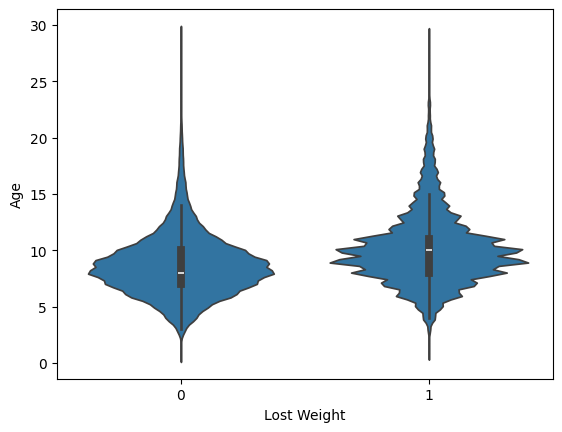

In [ ]:
# plot the graph here
sns.violinplot(data=df, x="Lost Weight", y="Age")


#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

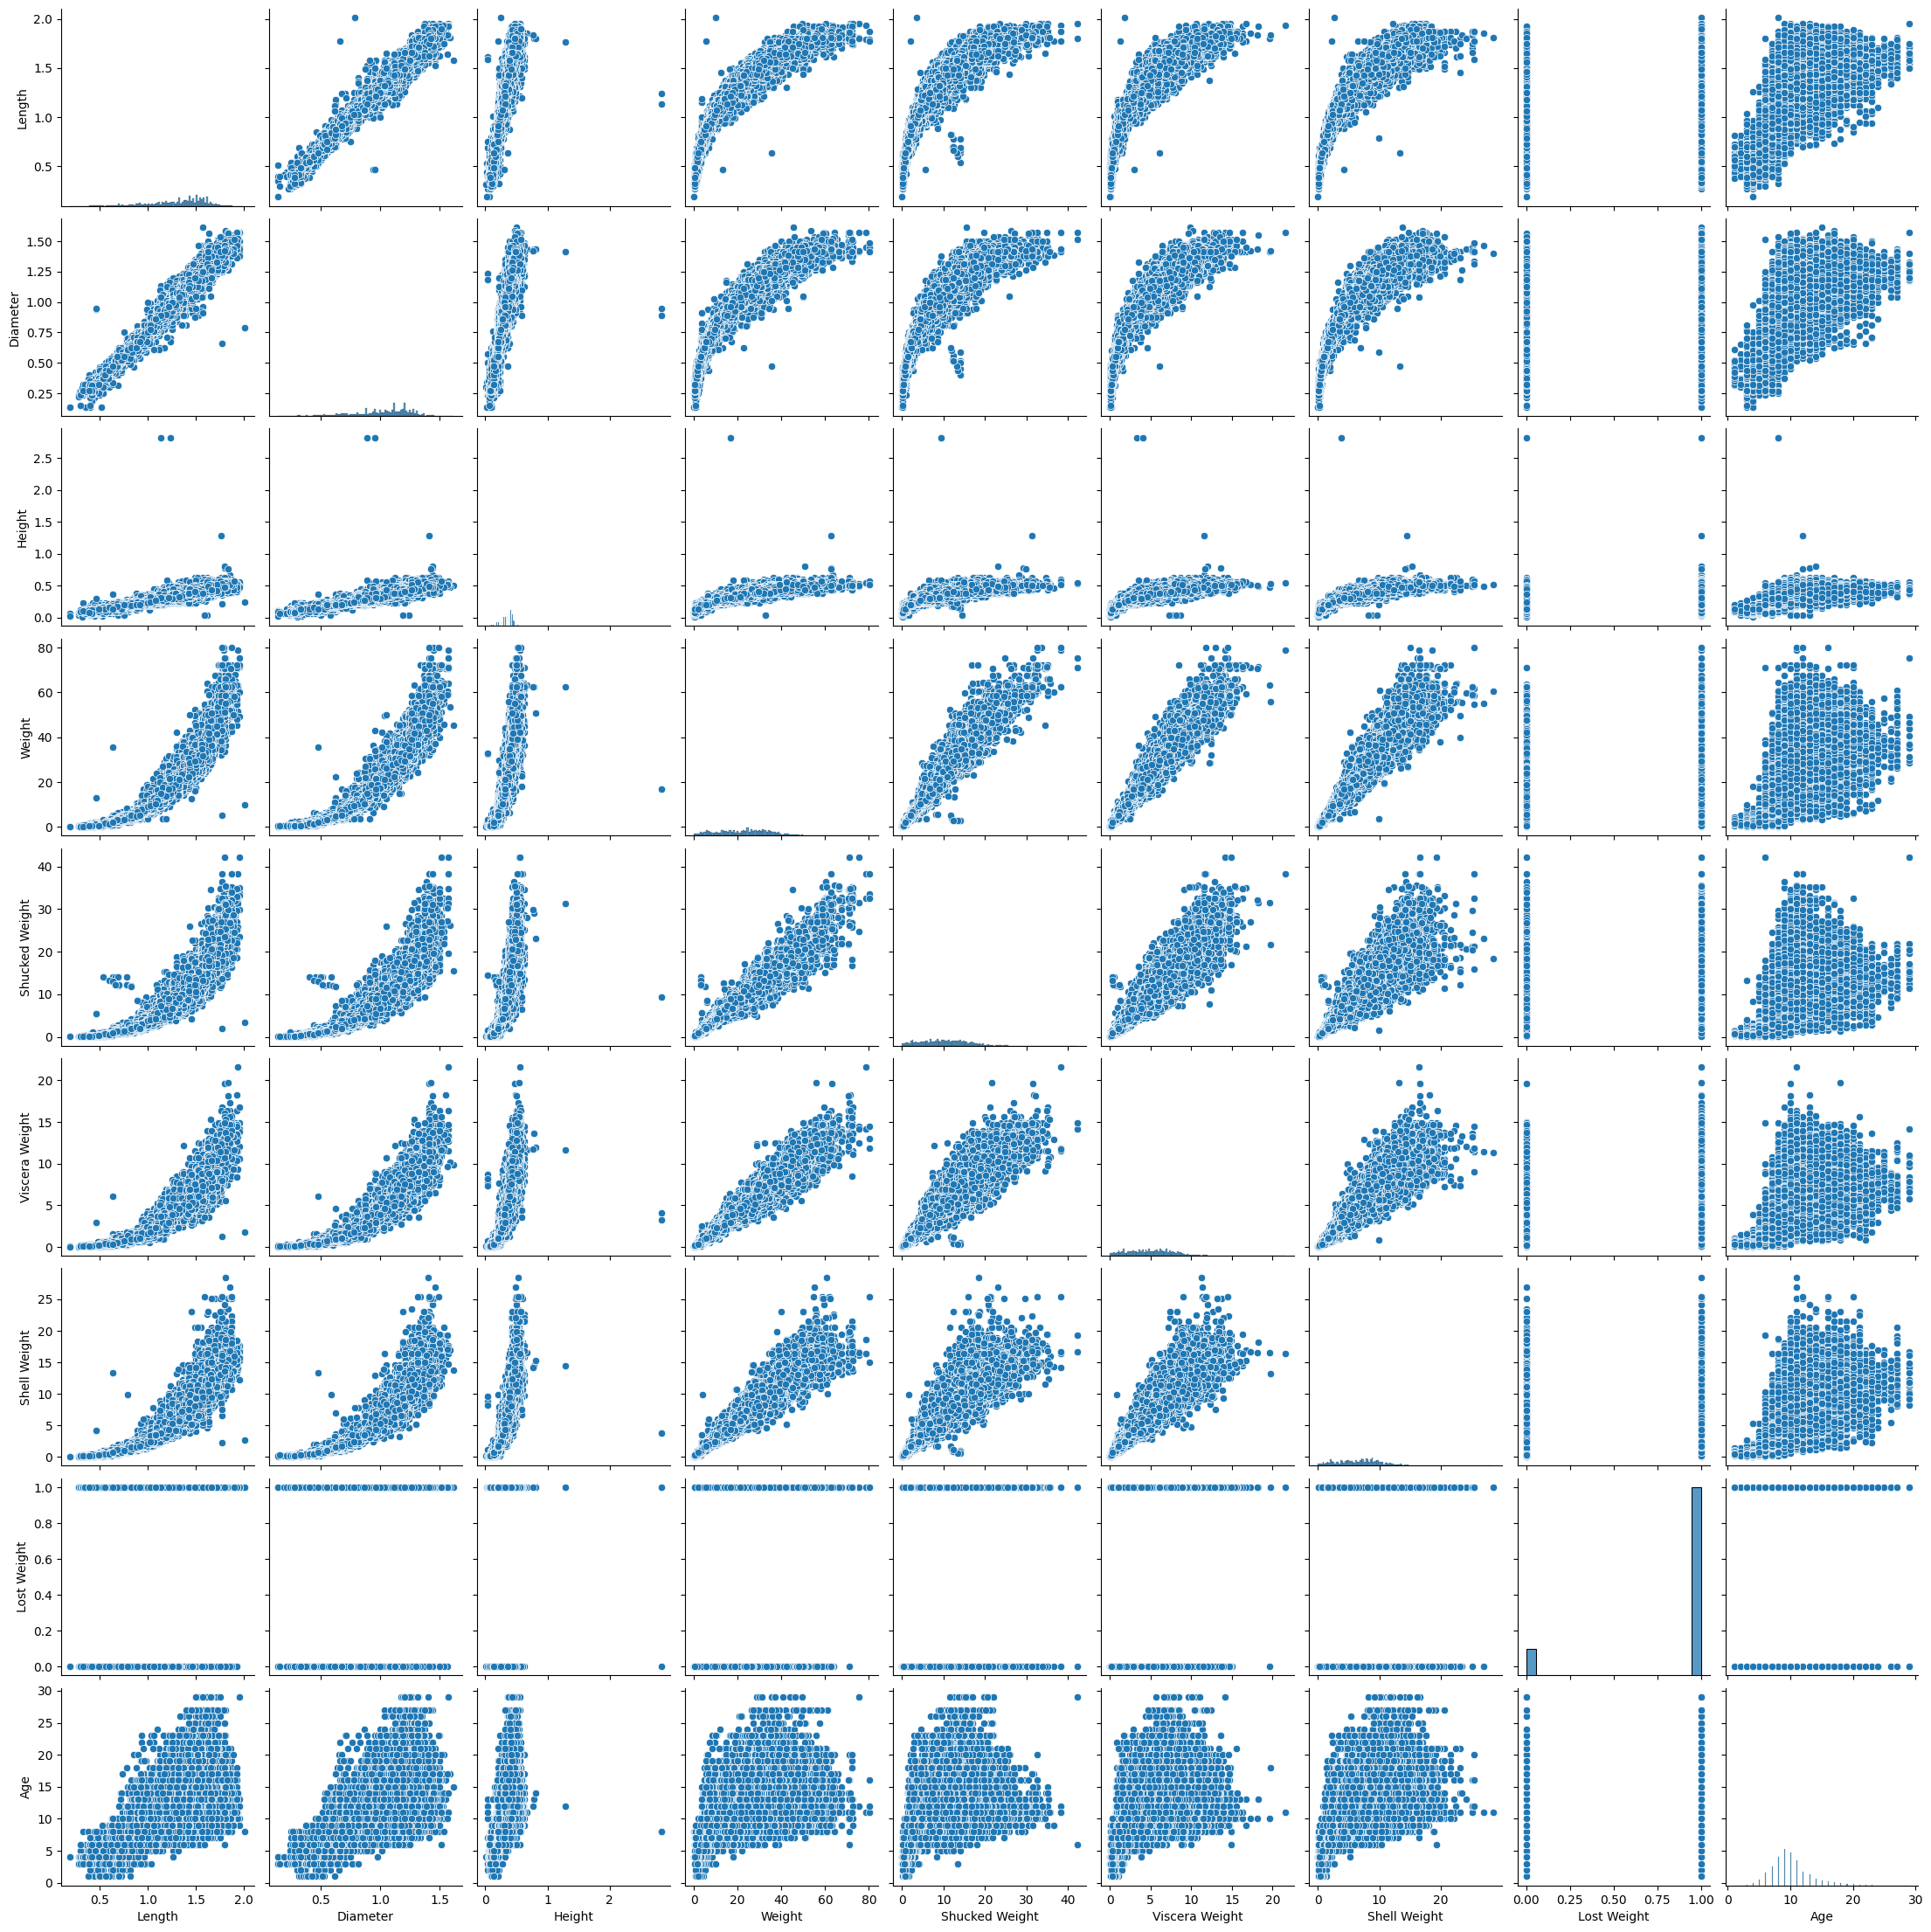

In [ ]:
# creativity batao
sns.pairplot(df)


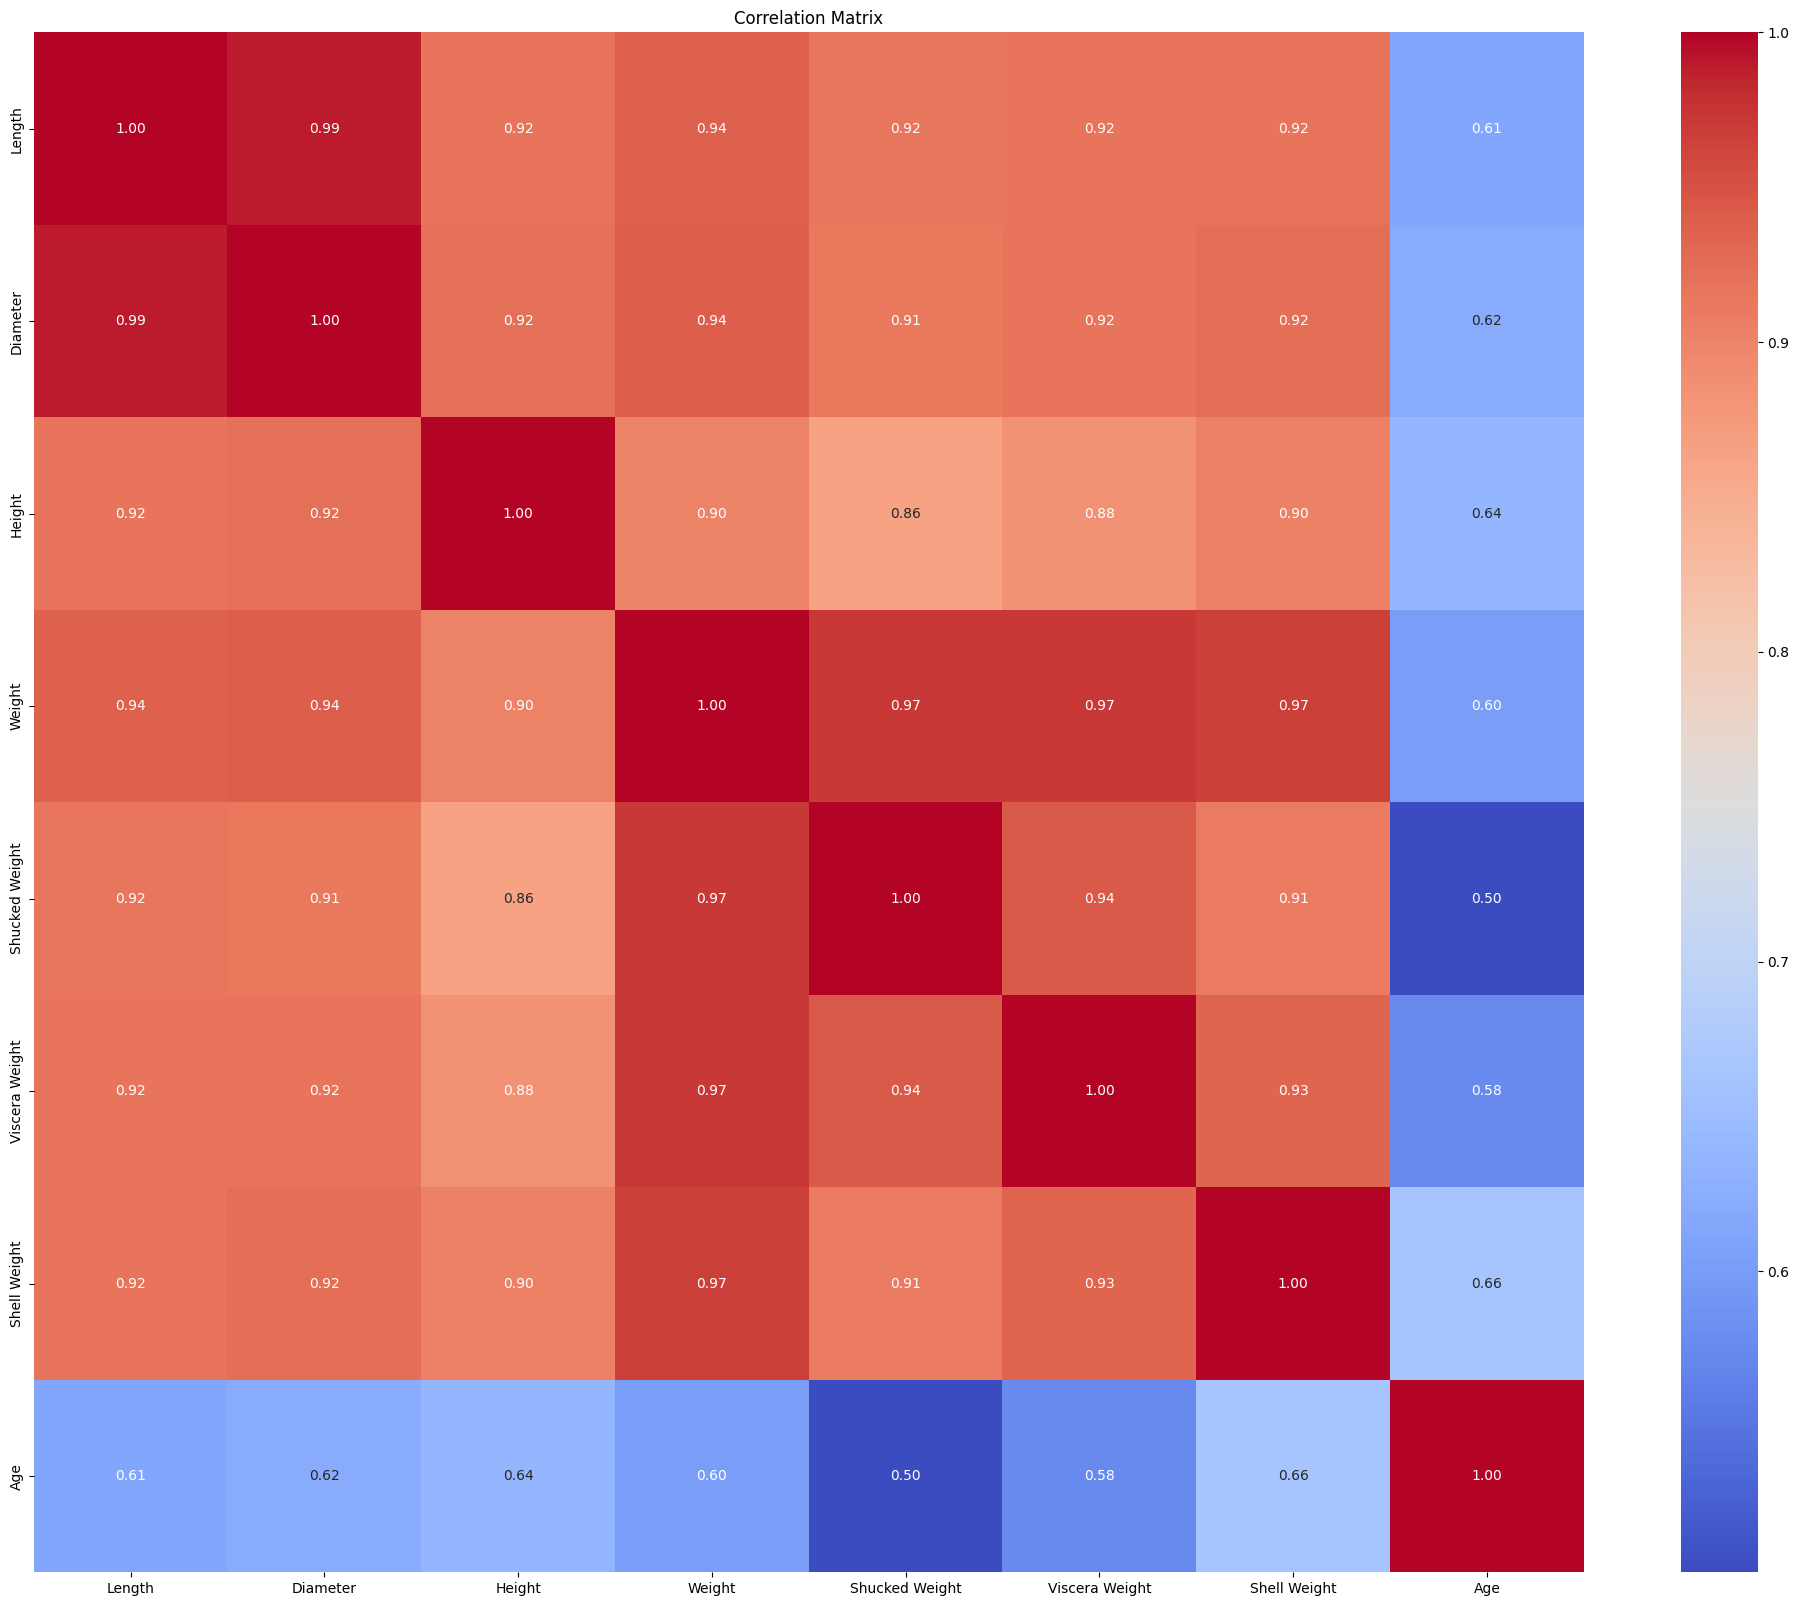

In [ ]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation of different features with "Age". Key insights:

1. **Shell Weight** has the highest correlation with **Age** (0.66), making it a strong predictor.
2. **Height**, **Diameter**, **Length**, and **Weight** have moderate correlations, making them useful for prediction.
3. **Lost_Weight** has a low correlation (0.15), suggesting it may be less useful as a feature.

 It helps quickly identify important features for machine learning by showing correlations with the target variable.


#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [ ]:
# write code here
df = pd.get_dummies(data=df)
df.head()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8,False,True,False


In [ ]:
df.shape

(74027, 12)

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [ ]:
# write code here
from sklearn.preprocessing import MinMaxScaler , StandardScaler
norm=MinMaxScaler()
original_columns = df.columns
original_index = df.index
df=pd.DataFrame(norm.fit_transform(df),columns=original_columns, index=original_index)


In [ ]:
df.head(10)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,0.732750,0.703390,0.128889,0.361254,0.301278,0.307185,0.291978,1.0,0.285714,0.0,1.0,0.0
1,0.499914,0.466102,0.093333,0.129449,0.106590,0.106131,0.118087,1.0,0.250000,0.0,1.0,0.0
2,0.657421,0.661017,0.128889,0.308837,0.268325,0.256427,0.232686,1.0,0.285714,0.0,0.0,1.0
3,0.828624,0.864407,0.173333,0.632194,0.482179,0.509197,0.525660,1.0,0.357143,1.0,0.0,0.0
4,0.582091,0.593220,0.115556,0.290243,0.283457,0.207647,0.207773,1.0,0.250000,0.0,1.0,0.0
5,0.719054,0.703390,0.142222,0.359660,0.317418,0.313777,0.277529,1.0,0.321429,0.0,0.0,1.0
6,0.760143,0.677966,0.120000,0.374358,0.282448,0.339486,0.302441,1.0,0.357143,0.0,0.0,1.0
7,0.616332,0.601695,0.120000,0.227909,0.195024,0.179301,0.197808,1.0,0.357143,0.0,1.0,0.0
8,0.773839,0.779661,0.151111,0.484328,0.401816,0.342782,0.377180,1.0,0.392857,1.0,0.0,0.0
9,0.458825,0.423729,0.088889,0.128033,0.105918,0.096902,0.103139,1.0,0.357143,0.0,0.0,1.0


For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [ ]:

# one hot encode the Sex column before running the next cell

Standardise df_std such that the one hot label encoded columns aren't affected.

In [ ]:
scaler_std=StandardScaler()
cols_to_scale = [
    'Length', 'Diameter', 'Height', 'Weight',
    'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age'
]
df_std = df.copy()
df_std[cols_to_scale] = scaler_std.fit_transform(df_std[cols_to_scale])
df_std.head(10)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,0.721062,0.633720,0.291804,0.441392,0.466785,0.568812,0.452966,1.0,-0.305481,0.0,1.0,0.0
1,-0.757165,-0.841851,-0.797111,-1.026040,-0.994493,-0.979678,-0.927616,1.0,-0.620542,0.0,1.0,0.0
2,0.242812,0.370225,0.291804,0.109566,0.219453,0.177881,-0.017777,1.0,-0.305481,0.0,0.0,1.0
3,1.329744,1.635001,1.652947,2.156572,1.824588,2.124674,2.308247,1.0,0.324641,1.0,0.0,0.0
4,-0.235438,-0.051367,-0.116539,-0.008142,0.333024,-0.197818,-0.215568,1.0,-0.620542,0.0,1.0,0.0
5,0.634107,0.633720,0.700147,0.431303,0.587927,0.619582,0.338247,1.0,0.009580,0.0,0.0,1.0
6,0.894971,0.475623,0.019575,0.524348,0.325453,0.817586,0.536038,1.0,0.324641,0.0,0.0,1.0
7,-0.018051,0.001332,0.019575,-0.402746,-0.330735,-0.416129,-0.294684,1.0,0.324641,0.0,1.0,0.0
8,0.981926,1.108011,0.972375,1.220510,1.221401,0.842971,1.129412,1.0,0.639703,1.0,0.0,0.0
9,-1.018028,-1.105346,-0.933225,-1.035008,-0.999541,-1.050757,-1.046291,1.0,0.324641,0.0,0.0,1.0


In [ ]:
# write code here



#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

In [ ]:
# One-hot encoding and label encoding are both ways to convert categorical labels into numbers,
# but they behave very differently and are used in different situations.

# Label encoding
# Label encoding maps each category to an integer; a single column remains as a single column.

# Example (colors):

# Red → 0

# Green → 1

# Blue → 2

# Key points:​

# Because only one numeric feature is created, it is memory‑efficient.

# It implicitly introduces an order: 0 < 1 < 2, which is only meaningful for ordinal categories
# like “Low, Medium, High”.

# This can mislead models that rely on distances or linear relationships by introducing a spurious ordering
# over nominal categories, which naturally come with no relative ordering, like colors or cities.


# One-hot encoding

# One-hot encoding creates one binary column per category and puts 1 in the column of the present
# category and 0 in all others.​

# Example (colors):

# Red →​

# Green →

# Blue →

# Key points:​

# There is no artificial order introduced; each category is independent, hence ideal for nominal data.

# Works well with models that assume numeric relationships in features: linear/logistic regression,
# neural networks, distance‑based methods.

# Increases dimensionality: the more unique categories, the more sparse binary columns you have; this
# will increase memory and computations.

# When to use which

# Perform label encoding when:

# The feature is ordinal, e.g. “Low, Medium, High”, education levels.​

# You are using tree‑based models - Decision Trees, Random Forests, Gradient Boosting -, which do not
# interpret the integer codes as distances in the same way as linear models.​ Use one-hot encoding
# when: The feature is nominal, for instance city, color, product ID, and the order does not exist.
# You use linear models, neural networks, or distance‑based models where the artificial ordering would
# hurt performance.